In [12]:
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

## Cordinates Using Eucledian Distances

In [2]:
x=np.array([1,2,3,4,5,6,7,8,9,10],dtype='int')
t=np.array([10,5,7,3,2,8,6,4,6,11],dtype='int')

In [3]:
cords=np.stack((x,t)).transpose()

In [4]:
a=[4,6] #under inversitgation 
expand=np.tile(a, (10, 1))#expanding to match input dim
dist=np.linalg.norm(cords-expand, axis=1)#get euc dist
print("Closest cord is: {}".format(cords[np.argmin(dist)]))

Closest cord is: [3 7]


In [5]:
cords

array([[ 1, 10],
       [ 2,  5],
       [ 3,  7],
       [ 4,  3],
       [ 5,  2],
       [ 6,  8],
       [ 7,  6],
       [ 8,  4],
       [ 9,  6],
       [10, 11]])

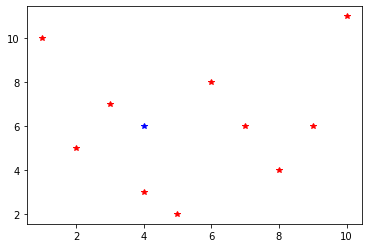

In [6]:
plt.plot(x,t,"r*")
plt.plot(4,6,"b*")

In [7]:
X=np.array([1,2,3])
w=np.array([[0.3,0.4,0.3]])
b=np.array([0.1,0.1,0.1])
y=np.dot(X,w.transpose())+b
print(y)
t=[2.1,2.1,2.1]
N=len(y)

[2.1 2.1 2.1]


## Textbook Example of Linear Regression

In [8]:
import csv
import numpy as np
with open('test_data1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for skip_lines in range(3): next(spamreader)
    x_cords=[]; y_cords=[]
    for row in spamreader:
        line_array=row[0].split(",")
        x_cords.append(line_array[0]);y_cords.append(line_array[1])
x=np.array(x_cords,dtype='float');
y=np.array(y_cords,dtype='float');

In [9]:
xx=np.sort(x)
yy=y[np.argsort(x)]

In [10]:
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

In [11]:
def update_weights(radio, sales, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    companies = len(radio)
    for i in range(companies):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += 2*radio[i] * ((weight*radio[i] + bias)-sales[i])
        # -2(y - (mx + b))
        bias_deriv += 2*((weight*radio[i] + bias)-sales[i])
    # We subtract because the derivatives point in direction of steepest ascent
    weight -= (weight_deriv / companies) * learning_rate
    bias -= (bias_deriv / companies) * learning_rate
    return weight, bias

In [12]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        weight,bias = update_weights(radio, sales, weight, bias, learning_rate)
        #Calculate cost for auditing purposes
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)
        # Log Progress
        if i % 10 == 0:
            print ("iter={:d} weight={:.2f} bias={:.4f} cost={:.2}".format(i,weight, bias, cost))
    return weight, bias, cost_history

In [13]:
m,b,v=train(xx,yy,-10,2,0.7,80)

iter=0 weight=-7.63 bias=5.9479 cost=7.9
iter=10 weight=-4.50 bias=2.5846 cost=1.4
iter=20 weight=-2.21 bias=1.5326 cost=0.49
iter=30 weight=-0.84 bias=0.9240 cost=0.18
iter=40 weight=-0.03 bias=0.5626 cost=0.063
iter=50 weight=0.45 bias=0.3477 cost=0.023
iter=60 weight=0.74 bias=0.2201 cost=0.009
iter=70 weight=0.91 bias=0.1442 cost=0.004


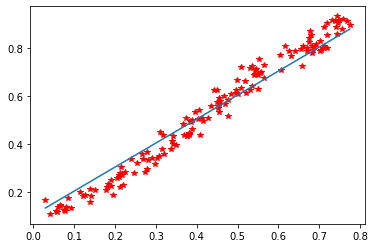

In [14]:
out=m*xx+b
plt.figure()
plt.plot(xx,yy,'r*')
plt.plot(xx,out);

iter=0 weight=-1.50 bias=0.5419 cost=0.7
iter=0 weight=-1.12 bias=0.7472 cost=0.29
iter=0 weight=-0.84 bias=0.7904 cost=0.18
iter=0 weight=-0.62 bias=0.7663 cost=0.14
iter=0 weight=-0.44 bias=0.7164 cost=0.11
iter=0 weight=-0.28 bias=0.6589 cost=0.09
iter=0 weight=-0.13 bias=0.6015 cost=0.073
iter=0 weight=-0.00 bias=0.5473 cost=0.06
iter=0 weight=0.11 bias=0.4974 cost=0.049
iter=0 weight=0.22 bias=0.4519 cost=0.04
iter=0 weight=0.31 bias=0.4107 cost=0.033
iter=0 weight=0.39 bias=0.3734 cost=0.027
iter=0 weight=0.47 bias=0.3398 cost=0.022
iter=0 weight=0.54 bias=0.3095 cost=0.018
iter=0 weight=0.60 bias=0.2822 cost=0.015
iter=0 weight=0.65 bias=0.2576 cost=0.012
iter=0 weight=0.70 bias=0.2354 cost=0.01
iter=0 weight=0.75 bias=0.2154 cost=0.0086
iter=0 weight=0.79 bias=0.1974 cost=0.0072
iter=0 weight=0.82 bias=0.1811 cost=0.0061


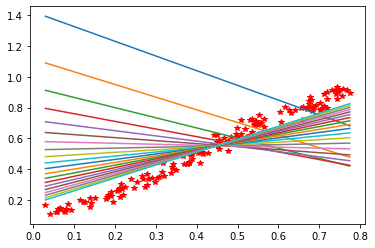

In [15]:
out=m*xx+b
plt.figure()
plt.plot(xx,yy,'r*')
m=-1;b=2
for u in range(20):
    m,b,v=train(xx,yy,m,b,0.7,2)
    out=m*xx+b
    plt.plot(xx,out);


## Linear Regression 

In [16]:
import csv
import numpy as np
with open('test_data1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for skip_lines in range(3): next(spamreader)
    x_cords=[]; y_cords=[]
    for row in spamreader:
        line_array=row[0].split(",")
        x_cords.append(line_array[0]);y_cords.append(line_array[1])
x=np.array(x_cords,dtype='float');
y=np.array(y_cords,dtype='float');

In [17]:
def cost_func(x,y,w,b):
    total_error=1/len(x)*np.sum((y-(w*x+b))**2)
    return total_error


In [18]:
def update_weights(x,y,w,b,lr):
    w=w-lr/len(x)*np.sum(  ((w*x+b) - y)*x   )
    b=b-lr/len(x)*np.sum(  (w*x+b)  - y      )

    return w,b

In [19]:
cost_hist = []; epochs=500; lr=0.7; w=4;b=1

for i in range(epochs):
    w,b = update_weights(x, y, w, b, lr)
    cost = cost_func(x, y, w, b)
    cost_hist.append(cost)

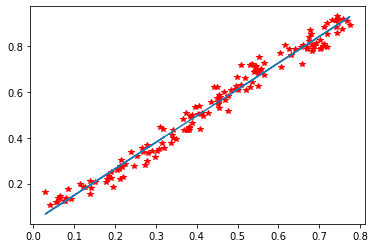

In [20]:
out=w*x+b
plt.figure();plt.plot(x,y,'r*');plt.plot(x,out);

## Polynomial Regression 

In [50]:
import csv
import numpy as np
with open('test_data2.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for skip_lines in range(3): next(spamreader)
    x_cords=[]; y_cords=[]
    for row in spamreader:
        line_array=row[0].split(",")
        x_cords.append(line_array[0]);y_cords.append(line_array[1])
x=np.array(x_cords,dtype='float');
y=np.array(y_cords,dtype='float');


In [51]:
def cost_func(x,y,v,w,b):
    total_error=1/len(x)*np.sum((y-(v*np.square(x)+w*x+b))**2)
    return total_error

In [52]:
def update_weights(x,y,v,w,b,lr):
    v=v-lr/len(x)*np.sum(  ((v*np.square(x)+w*x+b) - y)*(6*np.square(x)+x))
    w=w-lr/len(x)*np.sum(  ((v*np.square(x)+w*x+b) - y)*x )
    b=b-lr/len(x)*np.sum(  (v*np.square(x)+w*x+b)  - y )
    return v,w,b

In [53]:
hi=[]
cost_hist = []; epochs=5000; lr=1; v=-100;w=0;b=0 #10 -19 10
for i in range(epochs):
    v,w,b = update_weights(x, y,v, w, b, lr)
    cost = cost_func(x, y,v, w, b)
    cost_hist.append(cost)
    hi.append(v)

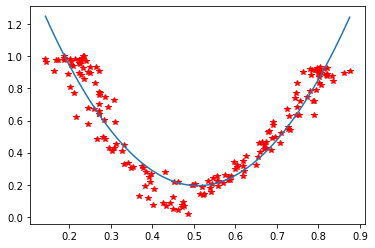

In [54]:
t=np.arange(min(x),max(x),0.001)
out=(v*(t)**2)+w*t+b
plt.figure();plt.plot(x,y,'r*');plt.plot(t,out);

## Cubic Regression

In [621]:
import csv
import numpy as np
with open('test_data3.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for skip_lines in range(3): next(spamreader)
    x_cords=[]; y_cords=[]
    for row in spamreader:
        line_array=row[0].split(",")
        x_cords.append(line_array[0]);y_cords.append(line_array[1])
x=np.array(x_cords,dtype='float');
y=np.array(y_cords,dtype='float');

xx=np.sort(x)
yy=y[np.argsort(x)]

In [622]:
def cost_func(x,y,s,v,w,b):
    total_error=1/len(x)*np.sum((y-(s*np.power(x, 3)+v*np.square(x)+w*x+b))**2)
    return total_error

In [623]:
def update_weights(x,y,s,v,w,b,lr):
    s=s-lr/len(x)*np.sum(  ((s*np.power(x, 3)+v*np.square(x)+w*x+b) - y)*(np.power(x, 3)))
    v=v-lr/len(x)*np.sum(  ((s*np.power(x, 3)+v*np.square(x)+w*x+b) - y)*(np.square(x)))
    w=w-lr/len(x)*np.sum(  ((s*np.power(x, 3)+v*np.square(x)+w*x+b) - y)*x )
    b=b-lr/len(x)*np.sum(  (s*np.power(x, 3)+v*np.square(x)+w*x+b)  - y )
    return s,v,w,b

In [626]:
x=xx;y=yy;
cost_hist = []; epochs=2000; lr=8; s=1;v=1;w=1;b=1 #10 -19 10
for i in range(epochs):
    s,v,w,b = update_weights(x, y,s,v, w, b, lr)
    cost = cost_func(x, y,s,v, w, b)
    cost_hist.append(cost)


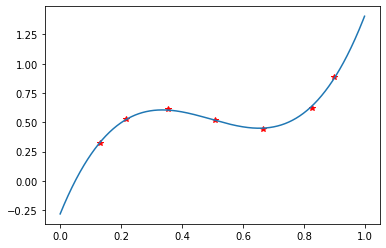

In [627]:
t=np.arange(0,1,0.001)
out=(s*(t)**3)+(v*(t)**2)+w*t+b
plt.figure();plt.plot(xx,yy,'r*');plt.plot(t,out);

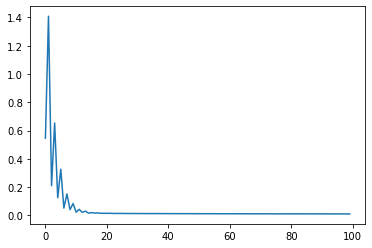

In [630]:
plt.plot(cost_hist[0:100])

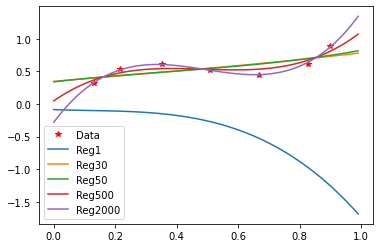

In [629]:
x=xx;y=yy;
cost_hist = []; epochs=2000; lr=8; s=1;v=1;w=1;b=1 #10 -19 10
plt.figure();plt.plot(xx,yy,'r*');
for i in range(epochs):
    s,v,w,b = update_weights(x, y,s,v, w, b, lr)
    cost = cost_func(x, y,s,v, w, b)
    cost_hist.append(cost)
    
    if (i in [1,30,50,500,1999])==True:
        t=np.arange(0,1,0.01)
        out=(s*(t)**3)+(v*(t)**2)+w*t+b
        plt.plot(t,out);
plt.legend(['Data', 'Reg1', 'Reg30','Reg50','Reg500','Reg2000'])
        

## N-Polynomial Regression

In [193]:
import csv
import numpy as np
with open('test_data4.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for skip_lines in range(3): next(spamreader)
    x_cords=[]; y_cords=[]
    for row in spamreader:
        line_array=row[0].split(",")
        x_cords.append(line_array[0]);y_cords.append(line_array[1])
x=np.array(x_cords,dtype='float');
y=np.array(y_cords,dtype='float');

xx=np.sort(x)
yy=y[np.argsort(x)]

In [194]:
def cost_func(x,y,W):
    equation=0
    for i in range(len(W)-1,-1,-1):
        equation=equation+W[i]*np.power(x, i)
    total_error=1/len(x)*np.sum((y-(equation))**2)
    return total_error

In [195]:
def update_weights(x,y,W,lr):
    equation=0; 

    for j in range(len(W)-1,-1,-1):
        for i in range(len(W)-1,-1,-1):
            equation=equation+W[i]*np.power(x, i)

        W[j]=W[j]-lr/len(x)*np.sum(  ((equation) - y)*(1.2*(len(W)-1))*np.power(x, j))
        equation=0;
    return W

In [196]:
def update_weights2(x,y,W,lr):
    equation=0; 
    for i in range(len(W)-1,-1,-1):
            equation=equation+W[i]*np.power(x, i)
    for j in range(len(W)-1,-1,-1):
        W[j]=W[j]-lr/len(x)*np.sum(  ((equation) - y)*np.power(x, j))
    return W

In [204]:
ORDER=7
x=xx;y=yy;
W=np.ones(ORDER+1)
cost_hist = []; epochs=2000; lr=0.001; 
for i in range(epochs):
    W = update_weights2(x, y,W, lr)
    cost = cost_func(x, y,W)
    cost_hist.append(cost)

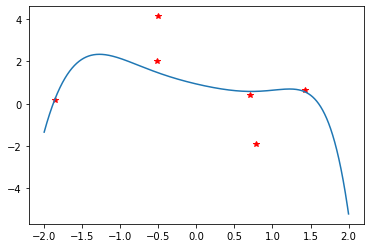

In [205]:
t=np.arange(-2,2,0.001)
out=0
for i in range(len(W)-1,-1,-1):
    out=out+W[i]*np.power(t, i)

plt.figure();plt.plot(xx,yy,'r*');plt.plot(t,out);

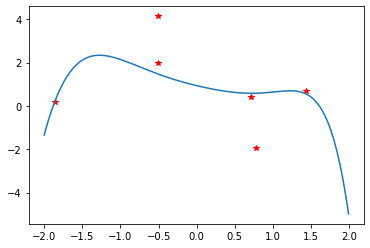

In [206]:
t=np.arange(-2,2,0.01); out=0;
for i in range(len(W)-1,-1,-1):
    out=out+W[i]*np.power(t, i)
    
plt.figure();plt.plot(xx,yy,'r*');plt.plot(t,out);

####  Find a better Way 

## Logistic Regression  - have to fix it (loss decreasing boundary is wrong)

In [10]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

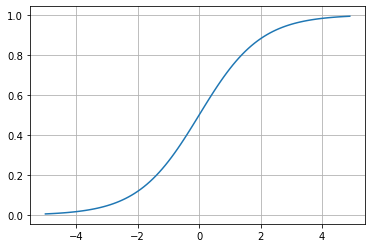

In [14]:
t=np.arange(-5,5,0.1)
y=sigmoid(t)
plt.plot(t,y)
plt.grid()

In [15]:
import csv
import numpy as np
with open('test_data6.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for skip_lines in range(3): next(spamreader)
    x_cords=[]; y_cords=[]
    for row in spamreader:
        line_array=row[0].split(",")
        x_cords.append(line_array[0]);y_cords.append(line_array[1])
        if line_array[2]=='C1':
            t_cords.append(0)
        else if line_array[2]=='C2':
            t_cords.append(1)
        else:
            t_cords.append("Error")
x=np.array(x_cords,dtype='float');
y=np.array(y_cords,dtype='float');
t=np.array(_cords,dtype='float');

xx=np.sort(x)
yy=y[np.argsort(x)]

In [16]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [50]:
def predict(features, weights):
    z=np.dot(features,weights)
    return sigmoid(z)

In [18]:
def cost_function(features, labels, weights):
    #Mean abs error
    observations=len(labels)
    predictions=predict(features, weights)
    class1_cost=-labels*np.log(predictions)
    class2_cost=(1-labels)*np.log(1-predictions)
    cost=class1_cost-class2_cost
    cost=cost.sum()/observations
    return cost

In [71]:
def update_weights(features,labels,weights,lr):
    N=len(features)
    predictions=predict(features,weights) #get preds
    gradient=np.dot(features.T,predictions-labels)
    gradient = gradient/N
    gradient=gradient*lr
    weights=weights-gradient
    return weights

In [20]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

In [21]:
def clasify(predictions):
    decision_boundary=np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

In [22]:
def train(features,labels,weights,lr,iters):
    cost_history = []
    for i in range(iters):
        weights=update_weights(features,labels,weights,lr)
        cost=cost_function(features,labels,weights)
        cost_history.append(cost)
        
        if i%1000 ==0:
            print ("iter: {},  cost: {}".format(i,cost))
    return weights, cost_history

In [171]:
features=np.stack((xx,yy)).transpose()#np.array([[1,4.85,9.63],[1,8.62,3.23],[1,5.43,8.23],[1,9.21,6.34]])
labels=t#np.array([1,0,1,0])
weights=np.array([1,1])
lr=0.01
iters=3000
w,cost_hist=train(features,labels,weights,lr,iters)

iter: 0,  cost: 2.27876780159627
iter: 1000,  cost: 0.6737018645334226
iter: 2000,  cost: 0.6610685675105842


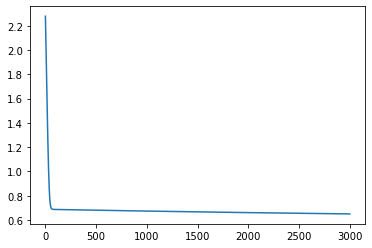

In [173]:
plt.plot(cost_hist)

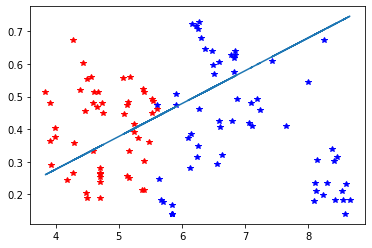

In [172]:
out=w[0]*x+w[1]
plt.figure();plt.plot(xx[t==0],yy[t==0],'r*');plt.plot(xx[t==1],yy[t==1],'b*');plt.plot(x,out);